# **Simple Image Preprocessing Techniques Using MINST Data**

**Please upvote if you find this helpful and comment any improvements or questions! Feel free to check out some of my other notebooks! **

Image preprocessing is an important step in any computer vision task, especially as the data becomes more complicated, noisy, and diverse. Good preprocessing could make the difference between a good model and an excellent model, impacting the final score greatly. Below, I will go over several very simple preprocessing techniques using the MINST digits dataset. (Disclaimer: By no means are these the ONLY preprocessing techniques available.)

* Importing Libraries and Setting Up the Dataframe
* Plotting Functions and Resizing Images
* Image Normalization
* Image Blurring
* Morphological Operations
* Edge Sharpening

For the preprocessed images, I will display the original four first and then the preprocessed four.

# **Importing Libraries and Establishing the Dataframe**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import Model

train = pd.read_csv('../input/digit-recognizer/train.csv')

images = pd.DataFrame()
def split_dataset(x,x_train):
    train_sub = train[train['label']==x].sample(4) #I will only be using 4 examples from each number
    x_train = x_train.append(train_sub,ignore_index=True)
    return x_train

for i in range (10):
    images = split_dataset(i,images)

print(images.head(4))

images = images.drop(['label'],axis = 1)
images = images.values.reshape([-1,28,28,1]) 

# **Plotting Functions and Resizing Images**

In [ ]:
def display_one (a):
    plt.imshow(a,cmap = 'gray')
    plt.axis('off') 
    plt.show()
def display(images):
    y = 0
    for i in range (10):
        plt.subplot(141), plt.imshow(images[y],cmap='gray')
        plt.axis('off')
        plt.subplot(142), plt.imshow(images[y+1],cmap='gray')
        plt.axis('off')
        plt.subplot(143), plt.imshow(images[y+2],cmap='gray')
        plt.axis('off')
        plt.subplot(144), plt.imshow(images[y+3],cmap='gray')
        plt.axis('off')
        y+=4
        plt.show()

def display_change (images, func):
    y = 0
    for i in range (10):
        plt.subplot(181), plt.imshow(images[y],cmap='gray')
        plt.axis('off')
        plt.subplot(182), plt.imshow(images[y+1],cmap='gray')
        plt.axis('off')
        plt.subplot(183), plt.imshow(images[y+2],cmap='gray')
        plt.axis('off')
        plt.subplot(184), plt.imshow(images[y+3],cmap='gray')
        plt.axis('off')
        plt.subplot(185), plt.imshow(func(images[y]),cmap='gray')
        plt.axis('off')
        plt.subplot(186), plt.imshow(func(images[y+1]),cmap='gray')
        plt.axis('off')
        plt.subplot(187), plt.imshow(func(images[y+2]),cmap='gray')
        plt.axis('off')
        plt.subplot(188), plt.imshow(func(images[y+3]),cmap='gray')
        plt.axis('off')
        y+=4
        plt.show()
def size(img):
    img = array_to_img(img, scale = False)
    img = img.resize((100,100))
    img = img.convert(mode = 'RGB')
    img = img_to_array(img)
    return img.astype(np.float64)
    
resized = []
for i in images:
    resized.append(size(i))
    
display(resized)

# **Image Normalization**

Normalizing image arrays between 0 and 1 is very beneficial when training deep learning models, because it helps the models converge and train faster. 

In [ ]:
resized = np.array(resized)
def normalized (img):
    return img/255.0

display_change(resized,normalized)

# **Image Blurring**

Next, we will take a look at image blurring. Image blurring is a way of to reduce the detail and noise in an image, making it more blurry, but helping reduce overfitting and improve generalization in training deep learning models. Small, minute details in certain images may cause the models to depend on those details, making them ineffective against variation in other images. We will use OpenCV in order to apply averaging, Gaussian filtering, median filtering, and bilateral filtering.

**Averaging**

Averaging is done by convoling an image with a normalized box filter, by taking the mean of the pixels in the kernel area and replacing the middle/central element. For example, a 3x3 normalized box filter would look like this.

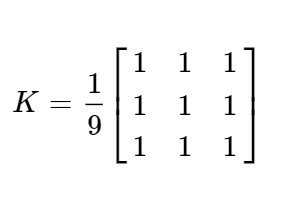

The box filter's width and height can be changed in the blur function, where a bigger box filter would lead to higher generationlization and a greater loss in higher level details.

In [ ]:
def averaging(img):
    return cv2.blur(img,(5,5))

display_change(resized,averaging)

**Gaussian Filtering**

In Gaussian Filtering, instead of using a normalized box filter, a Gaussian kernel is used instead. This method is especially effective in removing Gaussian noise, which is noise that has a probability density function equal to the normal distribution. 

![](https://lh3.googleusercontent.com/proxy/Z7zDMAdZgJp8m-K-PPpC6H_b6HwGFfb-Q-TlWR1a_eoTi54mfWuIauHiLkivxnkV6brBVWdVFY9D8piidguQ57R0od2ouyggwg9jhWgEgYZvUXki8p928w)

Here, the width and height are specificed again (But this time they have to be odd), and the standard deviation must be specified. 

![](https://www.researchgate.net/profile/Oleg_Shipitko/publication/325768087/figure/fig2/AS:637519863508992@1529007988866/Discrete-approximation-of-the-Gaussian-kernels-3x3-5x5-7x7.png)

In [ ]:
def gaussian(img):
    return cv2.GaussianBlur(img,(5,5),0)

display_change(resized,gaussian)

**Median Filtering**

Median filtering, which is very similar to averaging, changes the central element of the kernel area to the median of the values in the kernel space. This is very effective against salt-and-pepper noise and the kernel size should always be a positive odd number.

![](https://www.southampton.ac.uk/~msn/book/new_demo/median/Picture1.png)

Note: The image passing through the medianBlur function must be of dtype float32.

In [ ]:
def median(img):
    return cv2.medianBlur(np.float32(img),3)

display_change(resized, median)

**Bilateral Filtering**

And finally, bilateral filtering utilizes Gaussian filtering twice in order to preserve edge detail while also effectively removing noise. First, a Gaussian filter is taken in space, but a second one is taken as a function of the pixel difference. The first Gaussian function ensures only nearby pixels are blurred, while the second Gaussian function ensures that only pixels whose values are close to the central element are blurred, rather than elements with greater differences, which could indicate an edge.

![](https://www.researchgate.net/profile/Fatih_Porikli/publication/221361504/figure/fig1/AS:305607526633472@1449873920125/Bilateral-filter-has-spatial-and-range-components.png)

In [ ]:
def bilateral(img):
    return cv2.bilateralFilter(img.astype(np.uint8),9,75,75)

display_change(resized,bilateral)

# **Morphological Operations**

Next, we will discuss morphological operations, which are a collection of nonlinear operations that deal with the shape (or morphology) of the image. These techniques are less concerned with the pixel values, such as the smoothing techniques presented above, rather the relative ordering of the pixel values (According to [Wikipedia](https://en.wikipedia.org/wiki/Morphological_image_processing)). These techniques utilize structuring elements, which are positioned throughout the image at different locations, where the operation figures out the correlation with the structuring elements with its surrounding elements. Some operations test whether they "fit" while others test contrast and "hits".

![](https://www.cs.auckland.ac.nz/courses/compsci773s1c/lectures/ImageProcessing-html/morph-probing.gif)

With each morphological operation, I will provide examples of a change in kernel size and a change in iterations, in order to encompass those hyperparameters. In general, though, a larger kernel size works in larger steps while larger iterations tend increase the effect of the operation.

**Dilation**

First off, dilation monitors "hits" or contrasts to the pixels, and adds an extra layer of pixels to the inner and outer boundaries of the shapes. 

![](https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/diltbin.gif)

In [ ]:
kernel = np.ones((5,5),np.uint8)

def dilation(img):
    return cv2.dilate(img,kernel,iterations = 1)

display_change(resized,dilation)

In [ ]:
def dilation_1(img):
    return cv2.dilate(img,kernel,iterations = 5)

display_change(resized,dilation_1)

In [ ]:
kernel = np.ones((10,10),np.uint8)


display_change(resized,dilation)

**Erosion**

Erosion is the opposite of dilation, where it scans for "fits" among the boundaries, and strips a layer from the inner and outer boundaries of the shape. This can be used to sharpen edges or increase constrast between two very similar images.

![](https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/erodbin.gif)

In [ ]:
kernel = np.ones((5,5), np.uint8) 

def erosion(img):
    return cv2.erode(img,kernel,iterations = 1)

display_change(resized,erosion)

In [ ]:
def erode_1(img):
    return cv2.erode(img,kernel,iterations = 2)

display_change(resized,erode_1)

In [ ]:
kernel = np.ones((10,10),np.uint8)


display_change(resized,erosion)

**Compound Operations**

There are also examples of compound opeartions in morphology. The two main ones are opening and closing and image, which are a combination of a dilation and an erosion. 

* Closing is a way of filling in holes and solidifying images, increasing generalization and decreasing the importance of smaller marks or details. An erosion is performed first and then a dilation is performed.
* Opening is a way of decreasing small details in an image to "open" up larger details and forgo smaller, unimportant details. A dilation is performed first and then an erosion is performed. Any pixels that "survive" after the erosion are restroed after the dilation.

Opening and closing can also be applied, which ultimately closes larger objects and forgoes smaller details that are not connected to the main content of the image.

![](https://i.ytimg.com/vi/1owu136z1zI/maxresdefault.jpg)

In [ ]:
kernel = np.ones((5,5),np.uint8)

def closing(img):
    return erosion(dilation(img))

display_change(resized,closing)

In [ ]:
def opening(img):
    return dilation(erosion(img))

display_change(resized,opening)

# **Edge Sharpening**

And finally, edge sharpening is a useful tool, especially if your dataset has many labelled images with very similar features and edge sharpening can help make them more defined. Here, edge sharpening uses the function filter2D, by passing the kernel through, which increases the difference between the central element and its surrounding elements, making the distinction. This distinction can be more helpful for image EDAs and understanding the data better or possibly for feature engineering.

![](https://static.packt-cdn.com/products/9781785283932/graphics/B04554_02_11.jpg)

In [ ]:
kernel_sharpening = np.array([[-2,-2,-2],
                             [-2,25,-2],
                             [-2,-2,-2]])

def sharpening(img):
    return cv2.filter2D(img,-1,kernel_sharpening)

display_change(resized,sharpening)

**Thank you. Hopefully this helped you out. Feel free to comment below on any suggestions, comments, or concerns.**